In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("E:/Online Retail.xlsx")

In [3]:
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
df= df.dropna()

In [5]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [6]:
# check for duplicate rows
print(df.duplicated().sum())

5225


In [7]:
# remove duplicate rows
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
# ensure the data is in the correct format 
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate']).dt.date


In [9]:
# check for outliers
print(df['UnitPrice'].describe())

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64


In [10]:
print(df['UnitPrice'].median())

1.95


In [11]:
mean = np.mean(df['UnitPrice'])
mean

3.47406363979831

In [31]:
# using statistical knowledge to remove Outliers
for i in df['UnitPrice']:
    z_score=(i-4.632656)/97.233118
    if abs(z_score)>2:
        print("Outlier detected: ",i)

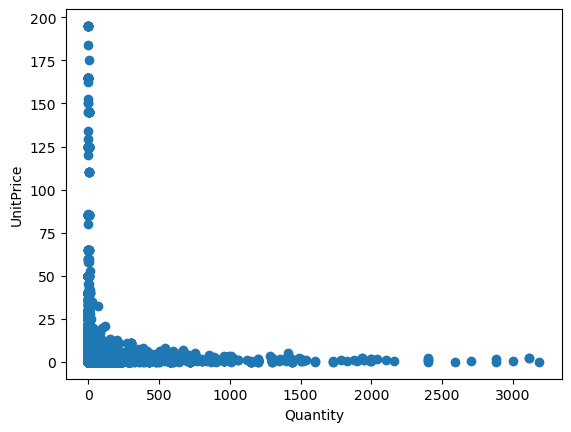

In [28]:
plt.scatter(df['Quantity'],df['UnitPrice'])
plt.plot(linewidth=10)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [15]:
df  = df.drop(df[df['UnitPrice']>200].index)

In [24]:
print(df['Quantity'].describe())

count    392655.000000
mean         12.728736
std          43.090365
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        4800.000000
Name: Quantity, dtype: float64


In [19]:
df = df.drop(df[df["Quantity"]<=0].index)

In [27]:
df = df.drop(df[df["Quantity"]>3500].index)

In [29]:
df['TotalPrice']= df['UnitPrice']*df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


In [30]:
df.to_excel('CleaningData.xlsx',sheet_name='Cleaned_Data')